<a href="https://colab.research.google.com/github/imthadh-ahamed/AI-ML/blob/branch-AIML/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Simple Linear Regression


**Task:** Predict student score given the number of hours spent by the student for studies </br>
**Input:** Hours studies </br>
**Output:** Score

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('./sample_data/w1_student_scores-220925-152435.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


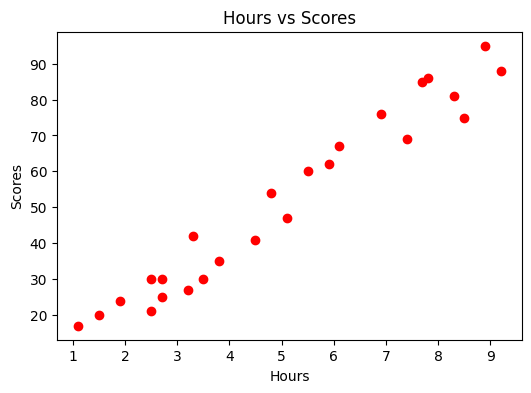

In [11]:
plt.figure(figsize=(6,4))
plt.plot(df['Hours'], df['Scores'], 'ro')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Find the Coefficient

Calculate the mean of the input and output

In [12]:
xmean = np.mean(df['Hours'])
ymean = np.mean(df['Scores'])

print(xmean, ymean)

5.012 51.48


Calculate the terms needed for the numator and denominator of beta

In [13]:
df['xycov'] = (df['Hours'] - xmean) * (df['Scores'] - ymean)
df['xvar'] = (df['Hours'] - xmean) ** 2

Calculate the coefficient

In [20]:
slope = df['xycov'].sum() / df['xvar'].sum()
intercept = ymean - (slope * xmean)
print(f'Slope = {slope}')
print(f'Intercept = {intercept}')

Slope = 9.775803390787473
Intercept = 2.4836734053731817


# Making prediction

In [27]:
# y = mx + c
#if Hours = 7
#y_pred = slope * df['Hours'] + intercept
y_pred = (slope * 7) + intercept
print(y_pred)

70.9142971408855


In [28]:
score_predicted = intercept + (slope * df['Hours'])
print(score_predicted)

0     26.923182
1     52.340271
2     33.766244
3     85.578002
4     36.698985
5     17.147378
6     92.421065
7     56.250592
8     83.622842
9     28.878343
10    77.757360
11    60.160913
12    46.474789
13    34.743825
14    13.237057
15    89.488324
16    26.923182
17    21.057700
18    62.116074
19    74.824618
20    28.878343
21    49.407530
22    39.631726
23    69.936717
24    78.734940
Name: Hours, dtype: float64


Compute the score of a student who studied for 7 Hours

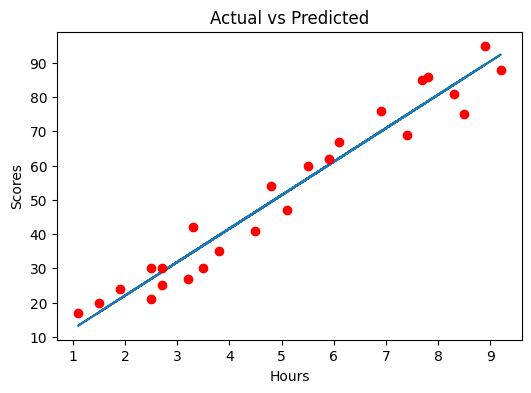

In [32]:
plt.figure(figsize=(6, 4))
plt.plot(df['Hours'], score_predicted)      #Regression Line
plt.plot(df['Hours'], df['Scores'], 'ro')   #Scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# 2. Multiple Linear Regression

**Task:** Predict petrol consumption of a country given various factors such as tax, distance of highways and population with driving licence. </br>
**Input:** Tax, distance of highways, average income and population with driving licence.</br>
**Output:** Expected petrol consumption

In [8]:
df = pd.read_csv('./sample_data/w1_petrol_consumption-220925-152435.csv')
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [9]:
df.shape

(48, 5)

In [11]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


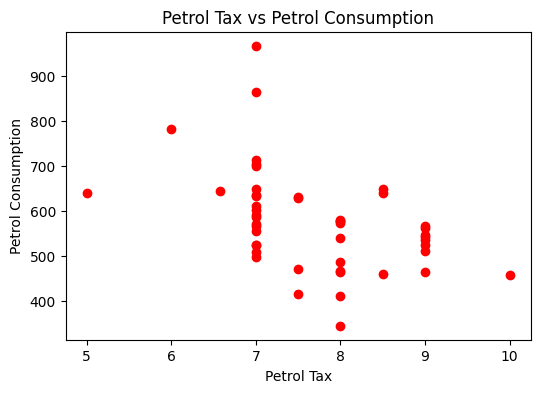

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(df['Petrol_tax'], df['Petrol_Consumption'], 'ro')
plt.title('Petrol Tax vs Petrol Consumption')
plt.xlabel('Petrol Tax')
plt.ylabel('Petrol Consumption')
plt.show()

Identify Outliers

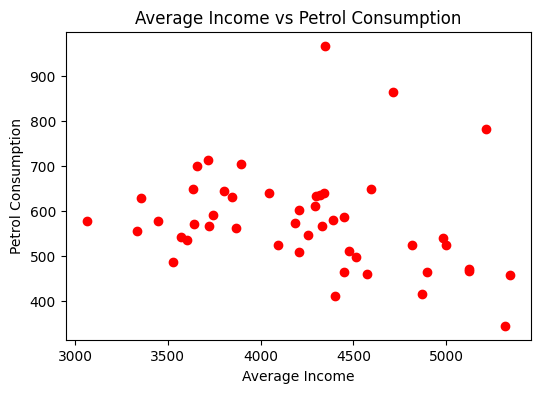

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(df['Average_income'], df['Petrol_Consumption'], 'ro')
plt.title('Average Income vs Petrol Consumption')
plt.xlabel('Average Income')
plt.ylabel('Petrol Consumption')
plt.show()

## Train the model

In [19]:
y = df['Petrol_Consumption']
X = df[['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)', 'Paved_Highways']]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [22]:
regressor.intercept_

455.975925226736

In [23]:
regressor.coef_

array([-4.35426168e+01, -4.84315480e-02,  1.23411131e+03, -6.30739049e-03])

## Make predictions

In [24]:
y_pred = regressor.predict(X_test)

In [26]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  600.537747
40     587  678.999345
26     577  582.882408
43     591  580.261408
24     460  527.814057
37     704  645.356403
12     525  582.552515
19     640  673.208271
4      410  563.222677
25     566  525.300260
8      464  491.006290
3      414  531.560867


## Evaluating the model

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 5139.850174686013
Mean Absolute Error (MAE): 57.89921765116723
Root Mean Squared Error (RMSE): 71.69274841074244


In [28]:
regressor.score(X_test, y_test)

0.3611714742571893

In [29]:
regressor.score(X_train, y_train)

0.7060485596401402

## Possible improvements </br>
*  Increase size of the data
*  Try non_linear relation
*  May require more features

